### pH titration of amino acids

Titration involves gradual addition or removal of protons. The figure shows the titration curve of the diprotic form of glycine. The two ionaizable groups of glycine, the carboxyl group and the amino group are titrated with a strong base such as NaOH. The plot has two distinct stages, corresponding to deprotonation of two different groups of glycine.

In the first stage of the titration, the $-COOH$ group of glycine (with its lower $pKa1$) loses its proton. At the midpoint of this stage, equimolar concentrations of the acid $^+H_3N-CH_2-COOH$ and the base $^+H_3N-CH_2-COO^-$ are present. As in the titration of any weak acid, a point of inflection is reached at this midpoint where the pH is equal to the $pKa$ of the protonated group that is being titrated.

The titration curve of glycine is that this amino acid has two regions of buffering power. One of these is the relatively flat portion of the curve, extending for approximately 1 pH unit on either side of the $pKa1 = 2.34$, indicating that glycine is a good buffer near this pH. The other buffering zone is centered around $pH = 9.60$. Within the buffering ranges of glycine, the Henderson-Hasselbalch equation can be used to calculate the proportions of proton-donor and proton-acceptor species of glycine required to make a buffer at a given pH.

In this case, at pH values near the isoelectric point, $pI$, glycine has little buffering power, explaining why the curve is steepest here.

* The code in this notebook was adapted from https://github.com/dtharvey/titrationCurves/blob/master/R/diwa_sb.R
* The text and figure are adapted from Lehninger *Principles of Biochemistry* 8th edition, by David L. Nelson and Michael M. Cox (MacMillan Learning)

**Try to see how changing the pKa values $pKa1$ and $pKa2$ affects the shape of the curve**

*Remember to execute the code after editing by clicking the "Run" button *



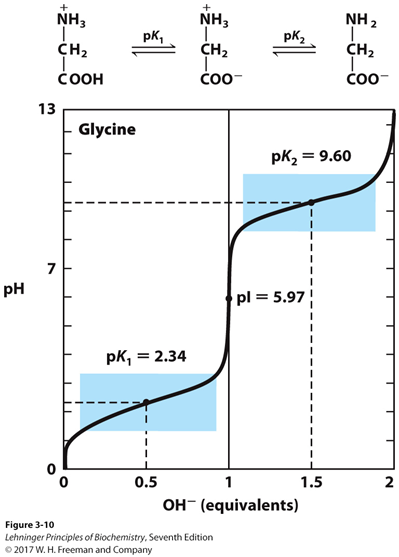

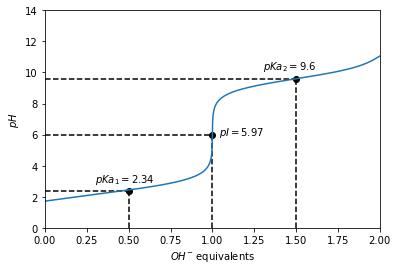

In [172]:
# Try changing these to different pKa values
pKa1 = 2.34
pKa2 = 9.60


# No need to change anything after here

import numpy as np
import matplotlib.pyplot as plt

conc_acid = 0.1
conc_base = 0.1
vol_acid = 50

pI = (pKa1 + pKa2) / 2

pkw = 14
kw = 10**(-pkw)
ka1 = 10**(-pKa1)
ka2 = 10**(-pKa2)

ph = np.arange(0,pkw,0.01)
h = 10**(-ph)
oh = kw/h

veq1 = conc_acid * vol_acid/conc_base
delta = h - oh
alpha1 = (ka1 * h)/(ka1 * ka2 + ka1 * h + h**2)
alpha2 = (ka1 * ka2)/(ka1 * ka2 + ka1 * h + h**2)
volume = vol_acid * (conc_acid * alpha1 + 2 * conc_acid * alpha2 - delta)/(conc_base + delta)

volume = np.where((volume > 0) & (volume < 4*veq1), volume, np.nan)
ph = np.where((volume > 0) & (volume < 4*veq1), ph, np.nan)

volume = volume[~np.isnan(volume)]
ph = ph[~np.isnan(ph)]


OH_equiv = volume/vol_acid
plt.plot(OH_equiv, ph)
plt.xlim(0, 2)
plt.ylim(0,14)
plt.xlabel('$OH^{-}$ equivalents')
plt.ylabel('$pH$')


plt.scatter([0.5], pKa1, c='k')
plt.hlines(pKa1, 0, 0.5, linestyles='dashed', colors='k')
plt.vlines(0.5, 0, pKa1, linestyles='dashed', colors='k')
plt.text(0.3, pKa1 + 0.6, '$pKa_1 = {}$'.format(pKa1))

plt.scatter([1.5], pKa2, c='k')
plt.hlines(pKa2, 0, 1.5, linestyles='dashed', colors='k')
plt.vlines(1.5, 0, pKa2, linestyles='dashed', colors='k')
plt.text(1.3, pKa2 + 0.6, '$pKa_2 = {}$'.format(pKa2))


plt.scatter([1.0], pI, c='k')
plt.hlines(pI, 0, 1.0, linestyles='dashed', colors='k')
plt.vlines(1.0, 0, pI, linestyles='dashed', colors='k')
plt.text(1.04, pI, '$pI = {}$'.format(pI))

plt.show()
